In [1]:
import utils # AMN defined functions
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
import os

# env and var etup
# Conversion factor from OD to biomass (gDW/L)
utils.ALPHA = 0.37
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# %%
###############################################################################
# TRAIN
###############################################################################

# Set environment (GPU configuration if needed)
print('Physical GPUs:', tf.config.list_physical_devices('GPU'))



2025-07-04 14:00:48.251986: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-04 14:00:48.284186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751630448.317291   56556 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751630448.327823   56556 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751630448.352271   56556 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Physical GPUs: []


2025-07-04 14:00:57.264329: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [2]:
## Paul's 
## Update with your actual file names
#folder = './'
#run_name = 'Paul_OD_20_1.0'
#media_file = folder+'data/'+'Paul_media.csv'                 
#od_file = folder+'data/'+run_name+'.csv'               
#cobra_model_file = folder+'data/'+'iML1515_duplicated.xml'
#biomass_rxn_id = 'BIOMASS_Ec_iML1515_core_75p37M';

In [3]:
# Millard's 
# Update with your actual file names
folder           = './'
run_name         = 'Millard'
media_file       = folder+'data/'+'Millard_media_from_interpolated.csv'                 
od_file          = folder+'data/Millard_OD_from_interpolated.csv'               
cobra_model_file = folder+'data/'+'iML1515_duplicated.xml'
biomass_rxn_id   = 'BIOMASS_Ec_iML1515_core_75p37M';

In [4]:
# Hyperparameters
seed = 10
np.random.seed(seed=seed)
hidden_layers = [500]
num_epochs = 3 # 1000
x_fold = 5       
batch_size = 10
patience = 100
N_iter = 3

In [5]:
utils.process_data(
    media_file,
    od_file,
    cobra_model_file,
    biomass_rxn_id,
    verbose=True
)

Transport[15,49] = 1.0  EX_met__L_e_o
Transport[12,84] = 1.0  EX_ile__L_e_o
Transport[13,89] = 1.0  EX_leu__L_e_o
Transport[9,96] = 1.0  EX_gln__L_e_o
Transport[17,98] = 1.0  EX_pro__L_e_o
Transport[23,103] = 1.0  EX_ade_e_o
Transport[3,108] = 1.0  EX_ala__L_e_o
Transport[4,109] = 1.0  EX_arg__L_e_o
Transport[6,110] = 1.0  EX_asp__L_e_o
Transport[2,112] = 1.0  EX_succ_e_o
Transport[27,113] = 1.0  EX_thymd_e_o
Transport[21,115] = 1.0  EX_tyr__L_e_o
Transport[8,121] = 1.0  EX_glu__L_e_o
Transport[24,125] = 1.0  EX_gua_e_o
Transport[0,180] = 1.0  EX_glc__D_e_o
Transport[26,186] = 1.0  EX_ura_e_o
Transport[22,188] = 1.0  EX_val__L_e_o
Transport[1,211] = 1.0  EX_xyl__D_e_o
Transport[10,217] = 1.0  EX_gly_e_o
Transport[14,219] = 1.0  EX_lys__L_e_o
Transport[18,227] = 1.0  EX_ser__L_e_o
Transport[20,229] = 1.0  EX_trp__L_e_o
Transport[5,1459] = 1.0  EX_asn__L_e_o
Transport[16,1489] = 1.0  EX_phe__L_e_o
Transport[19,1490] = 1.0  EX_thr__L_e_o
Transport[25,1524] = 1.0  EX_csn_e_o
Transport[11,1

(array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
        1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
        2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
        3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]),
 ['glc__D_e',
  'xyl__D_e',
  'succ_e',
  'ala__L_e',
  'arg__L_e',
  'asn__L_e',
  'asp__L_e',
  'cys__L_e',
  'glu__L_e',
  'gln__L_e',
  'gly_e',
  'his__L_e',
  'ile__L_e',
  'leu__L_e',
  'lys__L_e',
  'met__L_e',
  'phe__L_e',
  'pro__L_e',
  'ser__L_e',
  'thr__L_e',
  'trp__L_e',
  'tyr__L_e',
  'val__L_e',
  'ade_e',
  'gua_e',
  'csn_e',
  'ura_e',
  'thymd_e',
  'BIOMASS'],
 {1: array([[12.9       ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,

In [6]:
# Split data
model, train_array, train_dev, val_array, val_dev, val_ids = utils.create_model_train_val(
    media_file, od_file,
    cobra_model_file,
    biomass_rxn_id,
    x_fold=x_fold, 
    hidden_layers=hidden_layers, dropout_rate=0.2,
    verbose=False
)

In [7]:
# temporary saving
np.savetxt(f'{folder}model/{run_name}_val_array.txt', val_array, fmt='%f')
np.savetxt(f'{folder}model/{run_name}_val_dev.txt', val_dev, fmt='%f')
np.savetxt(f'{folder}model/{run_name}_val_ids.txt', np.asarray(val_ids), fmt='%d')

In [8]:
print("Any NaNs in train_array?", np.isnan(train_array).any())
print("Min/max biomass:", train_array[:, -1])  # just to check the last values

Any NaNs in train_array? True
Min/max biomass: [0.48396    0.32707328]


[Epoch 1/3] Train SV: 7.7e-01 conc: 1.2e+00 | Val SV: 7.6e+00 conc: 7.0e+00
[Epoch 2/3] Train SV: 6.9e+00 conc: 4.9e+00 | Val SV: 3.0e-01 conc: 1.2e+00
[Epoch 3/3] Train SV: 3.0e-01 conc: 1.3e+00 | Val SV: 1.6e-01 conc: 1.8e-01
Model weights saved to ./model/Millard_0.weights.h5 and config saved to ./model/Millard_0.config.json
[Epoch 1/3] Train SV: 1.3e-01 conc: 2.5e-01 | Val SV: 2.6e+01 conc: 1.1e+00
[Epoch 2/3] Train SV: 2.4e+01 conc: 1.7e+00 | Val SV: 1.2e-01 conc: 4.3e-01
[Epoch 3/3] Train SV: 1.5e-01 conc: 5.9e-01 | Val SV: 1.2e+00 conc: 7.5e-01
Model weights saved to ./model/Millard_1.weights.h5 and config saved to ./model/Millard_1.config.json
[Epoch 1/3] Train SV: 1.1e+00 conc: 6.7e-01 | Val SV: 2.2e+00 conc: 1.7e-01
[Epoch 2/3] Train SV: 2.2e+00 conc: 6.0e-02 | Val SV: 1.9e-01 conc: 6.1e-02
[Epoch 3/3] Train SV: 2.1e-01 conc: 3.8e-01 | Val SV: 6.1e-01 conc: 5.3e-01
Model weights saved to ./model/Millard_2.weights.h5 and config saved to ./model/Millard_2.config.json


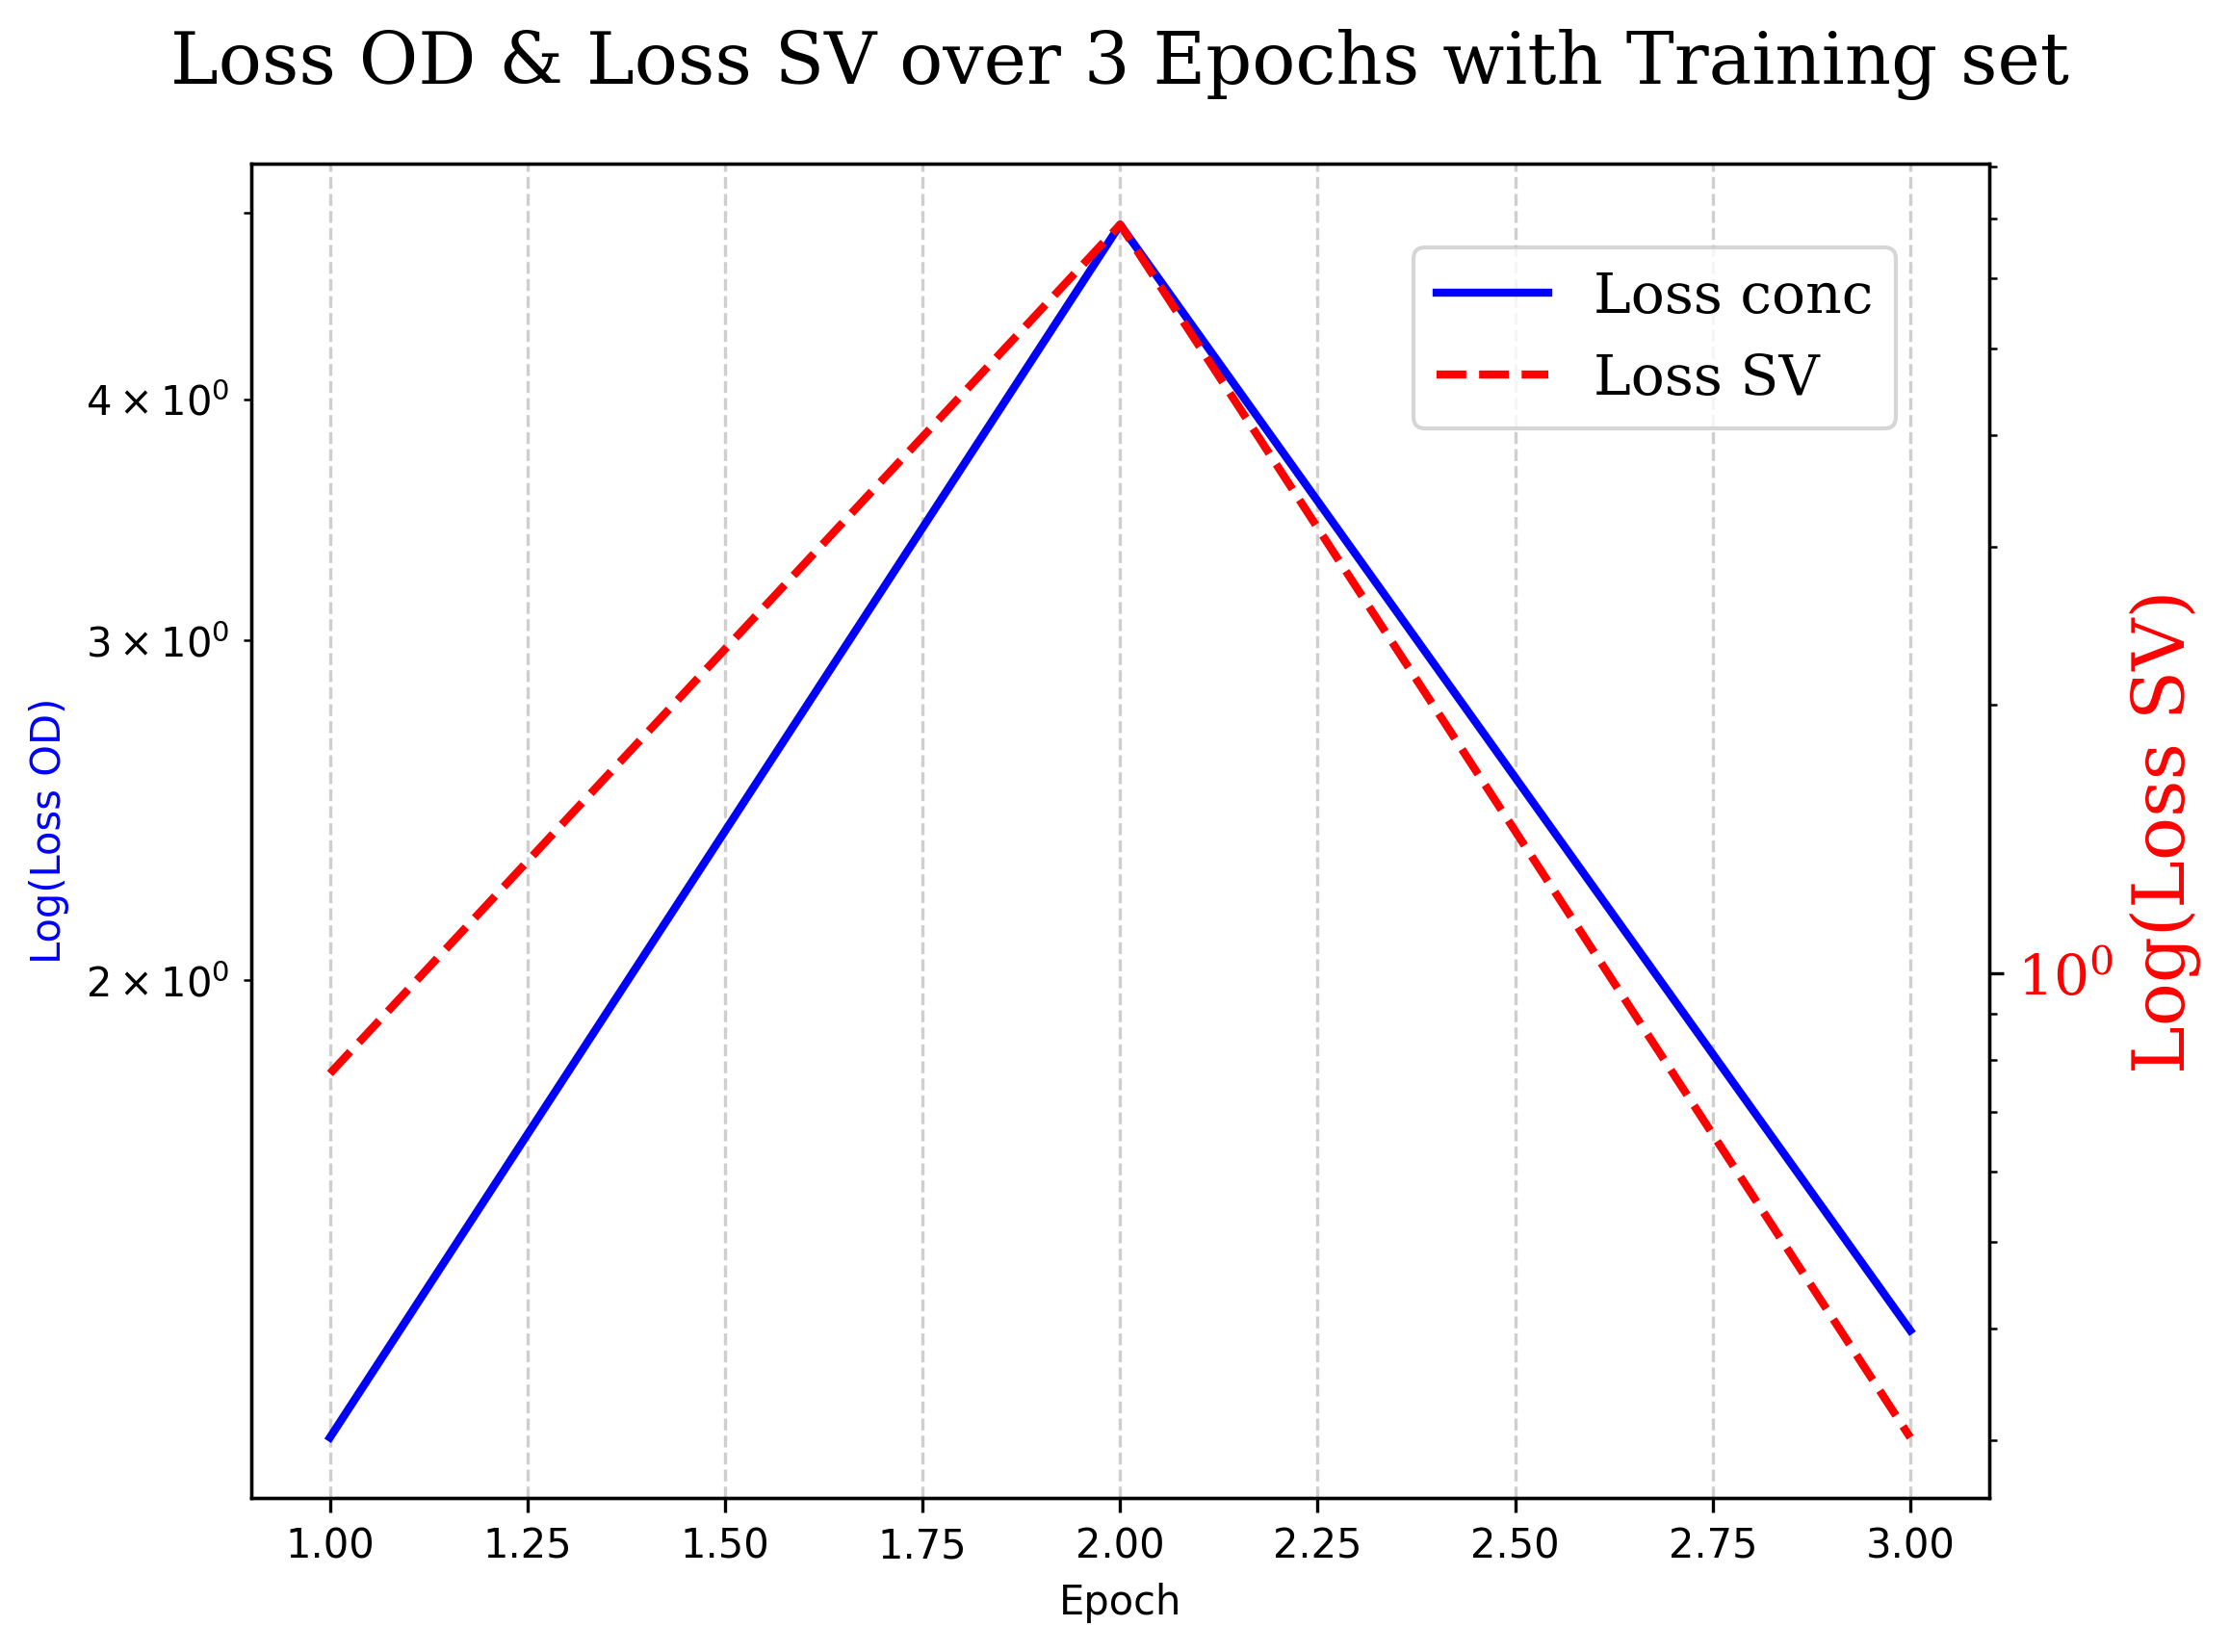

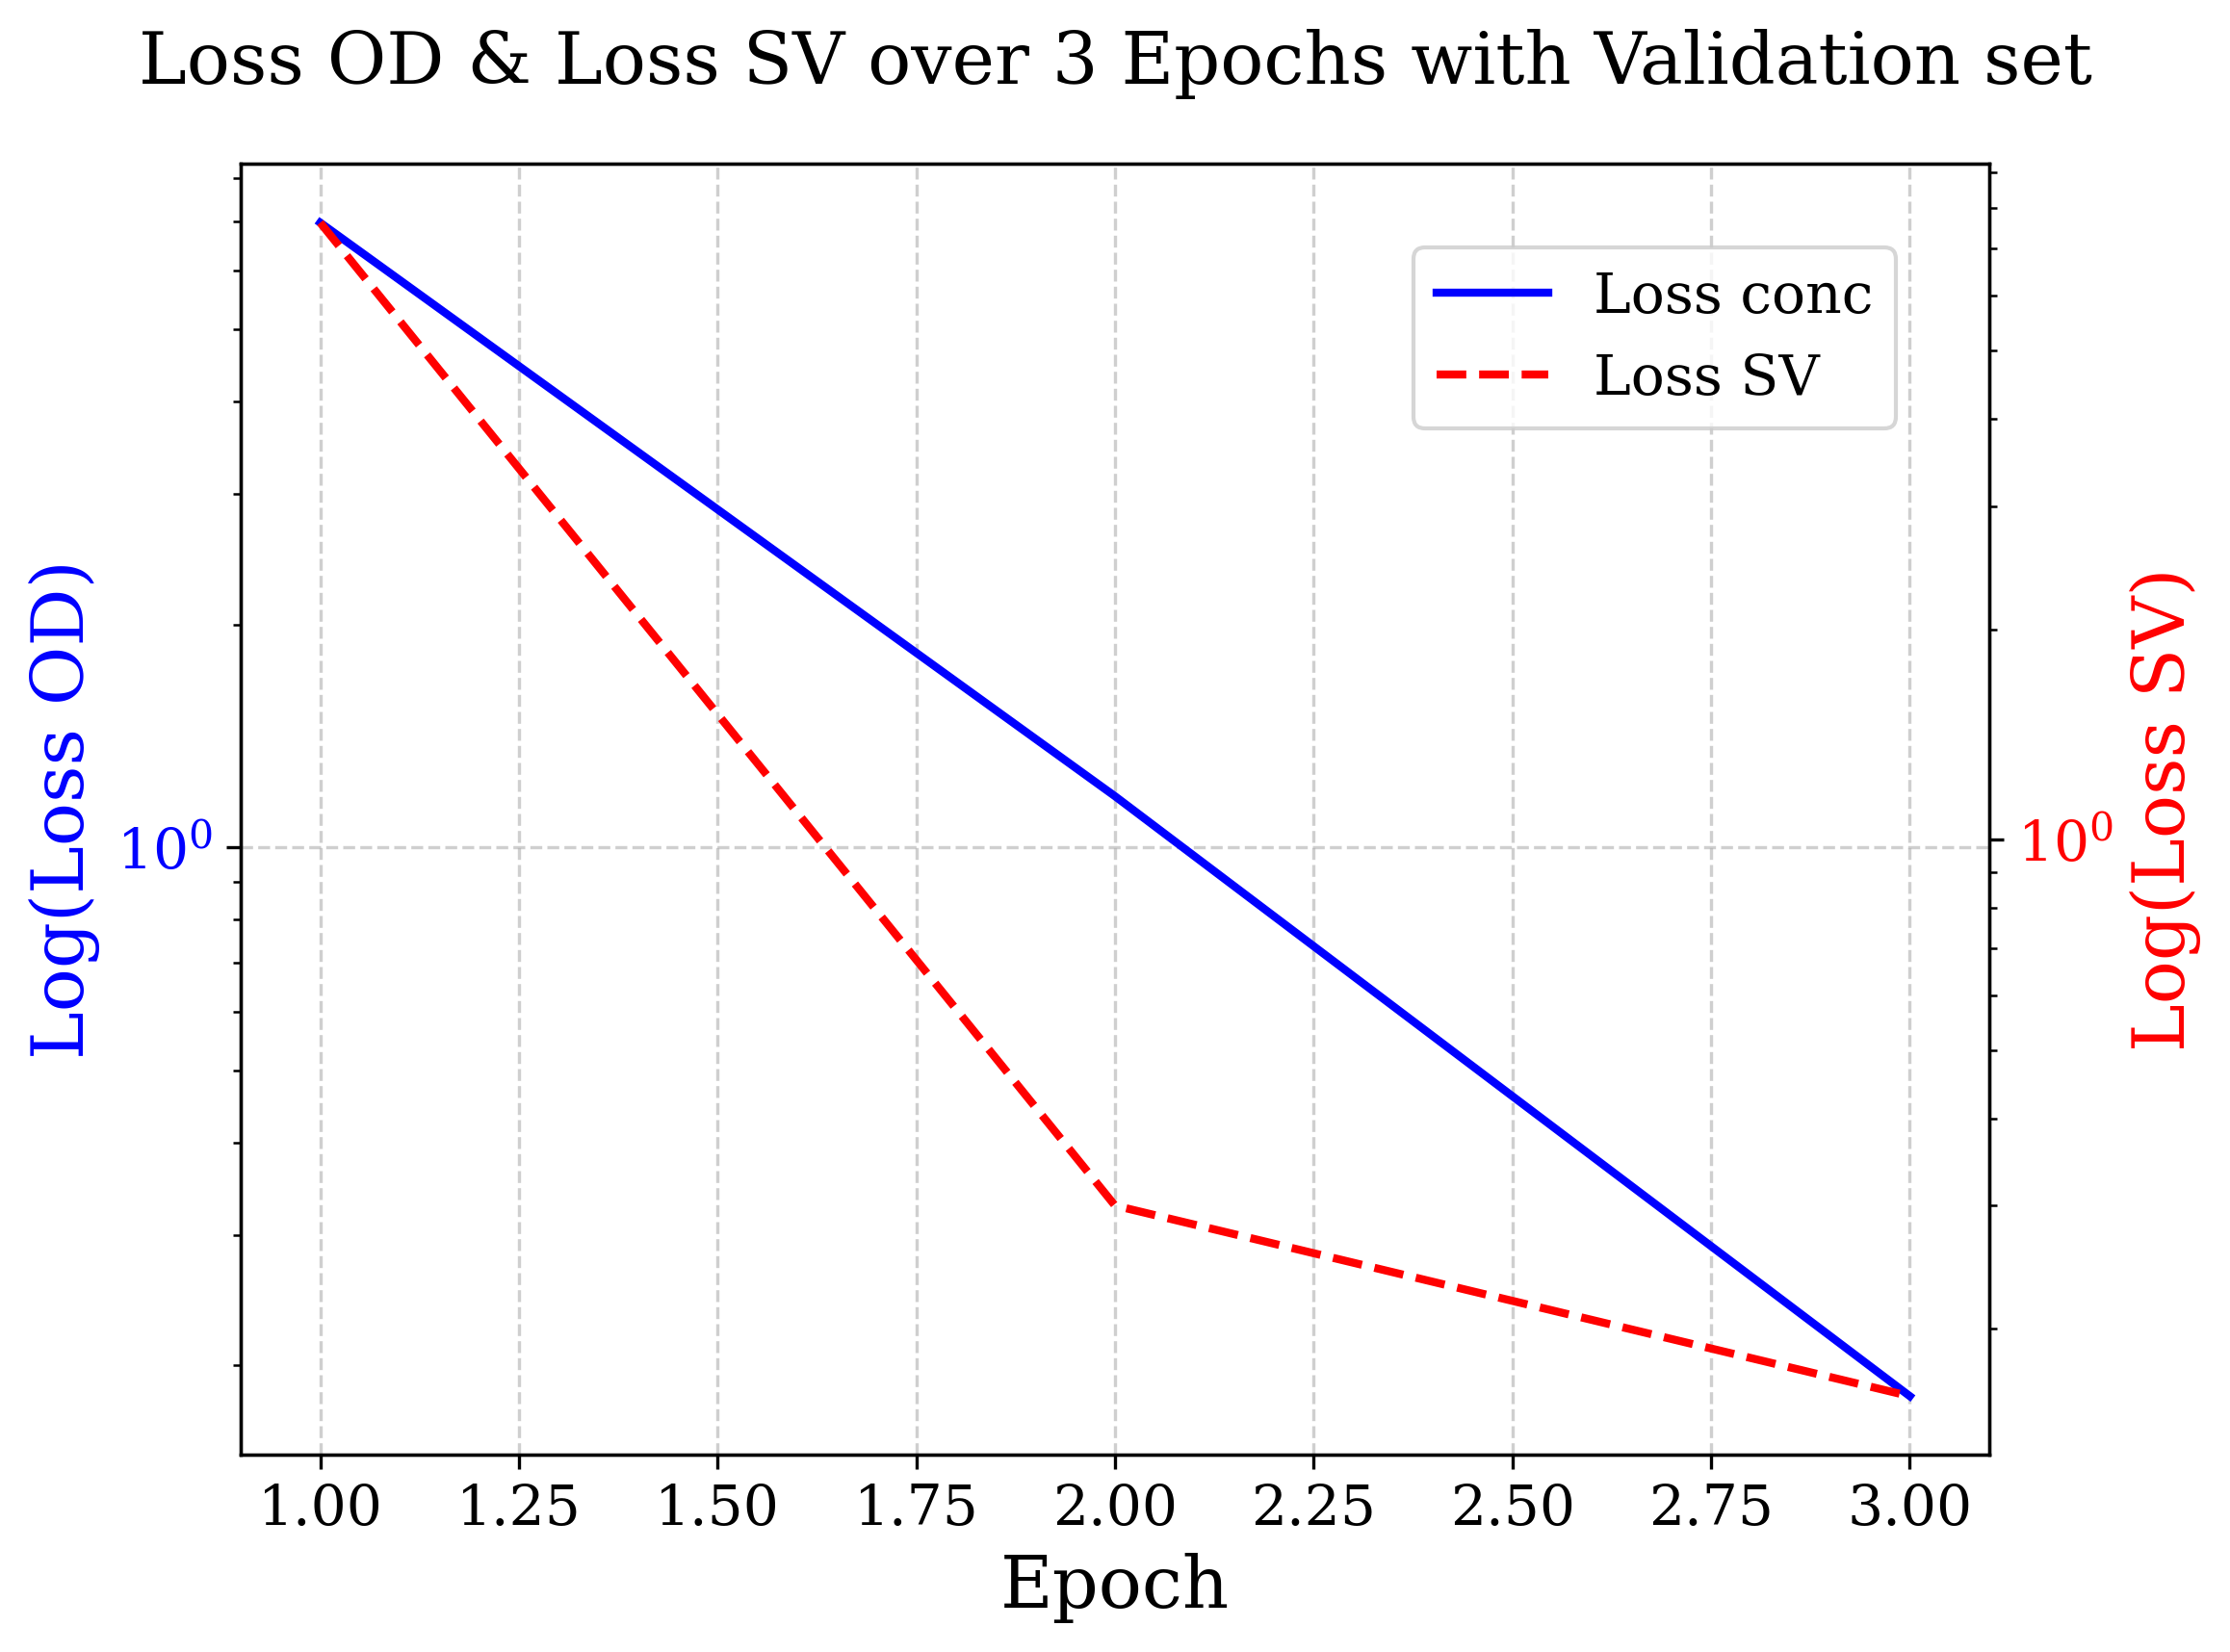

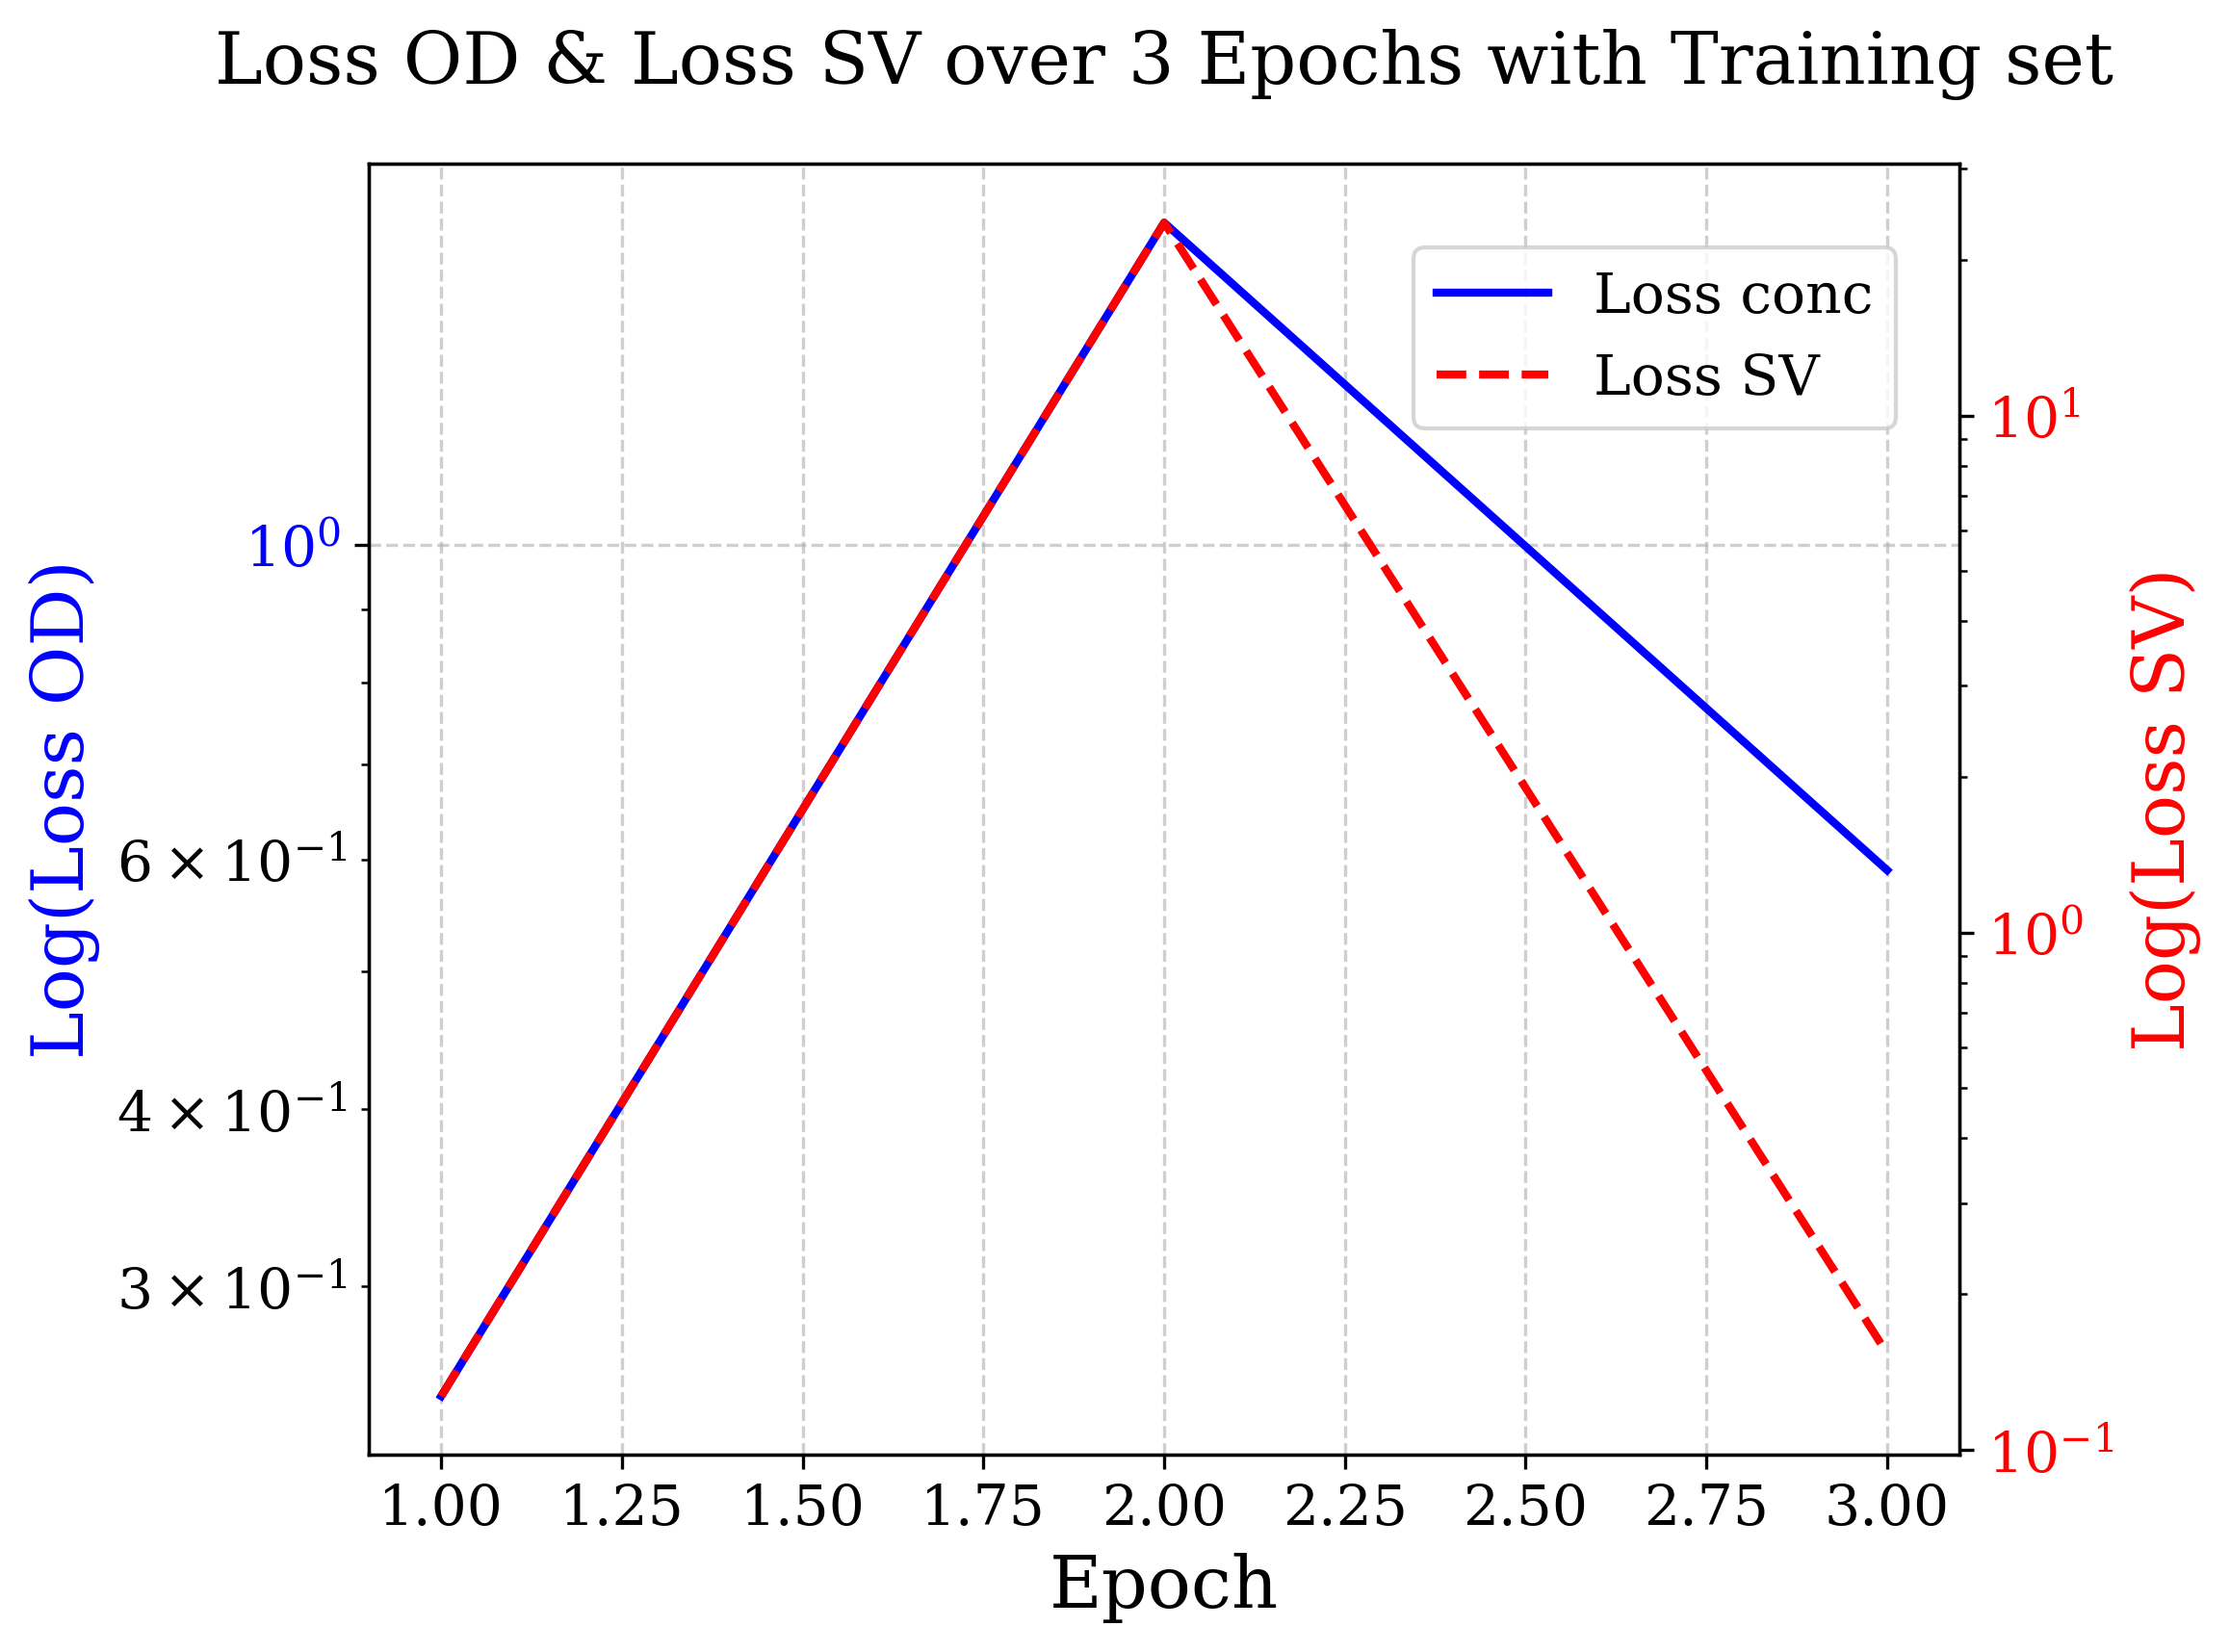

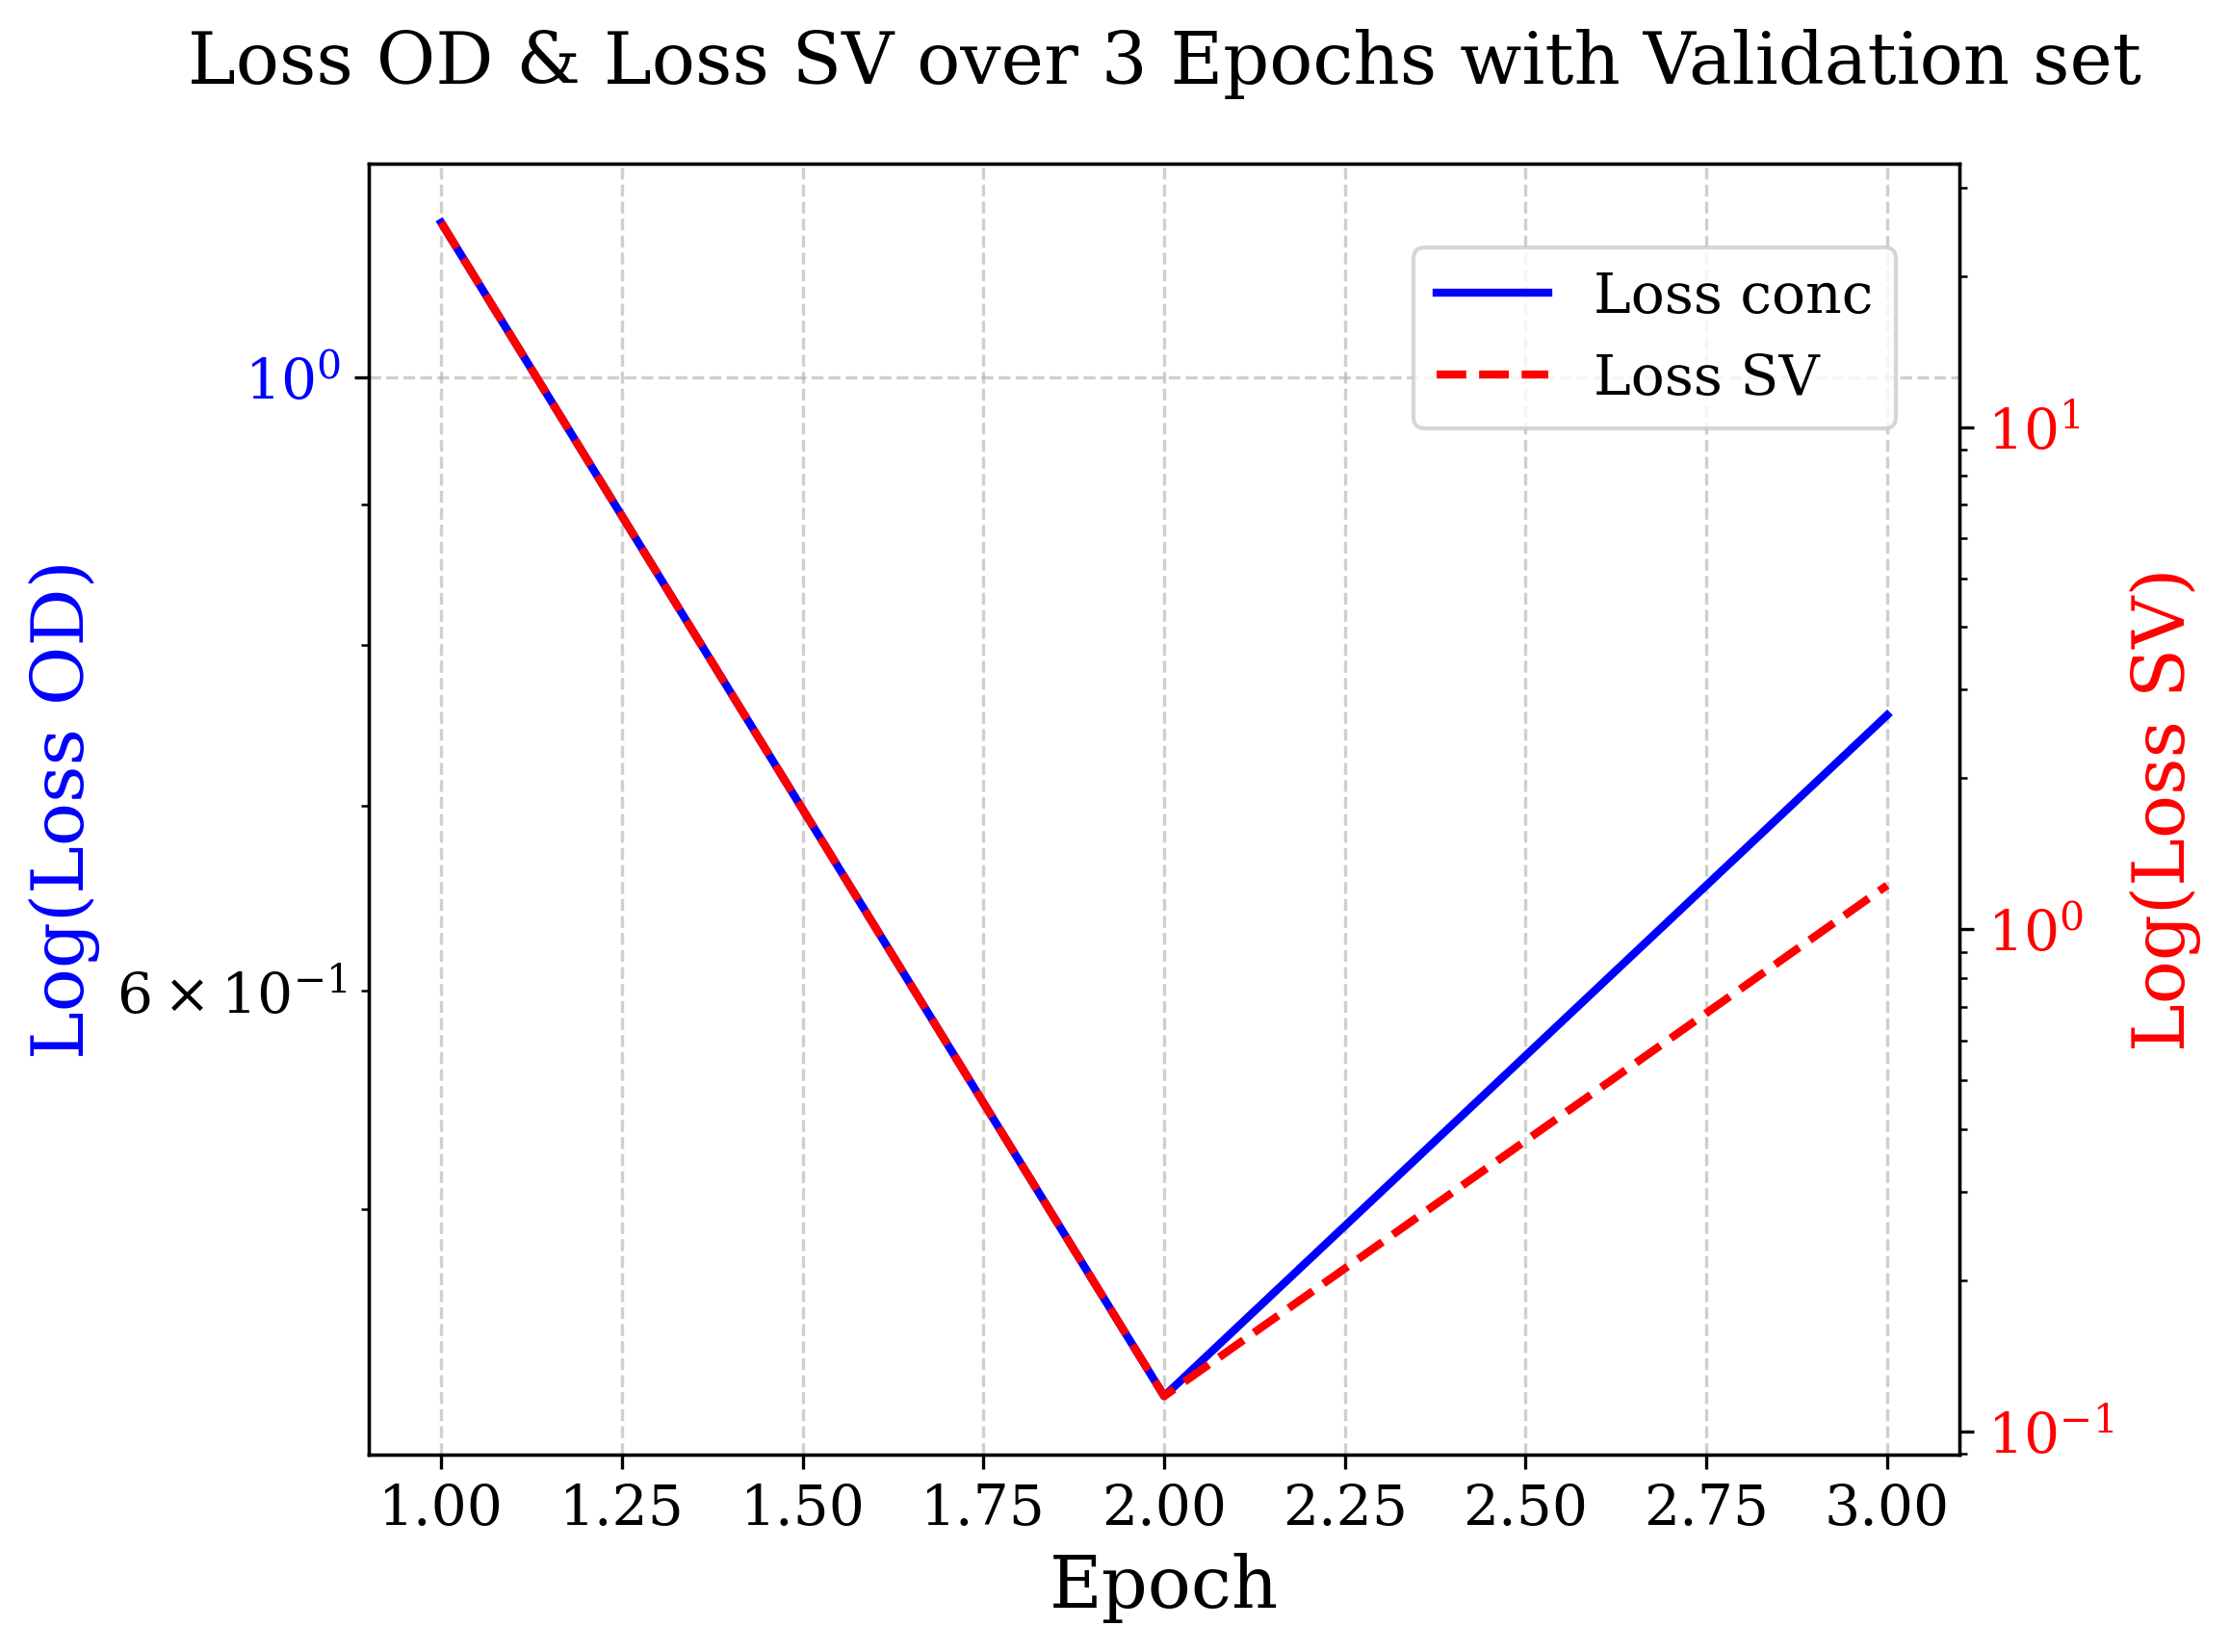

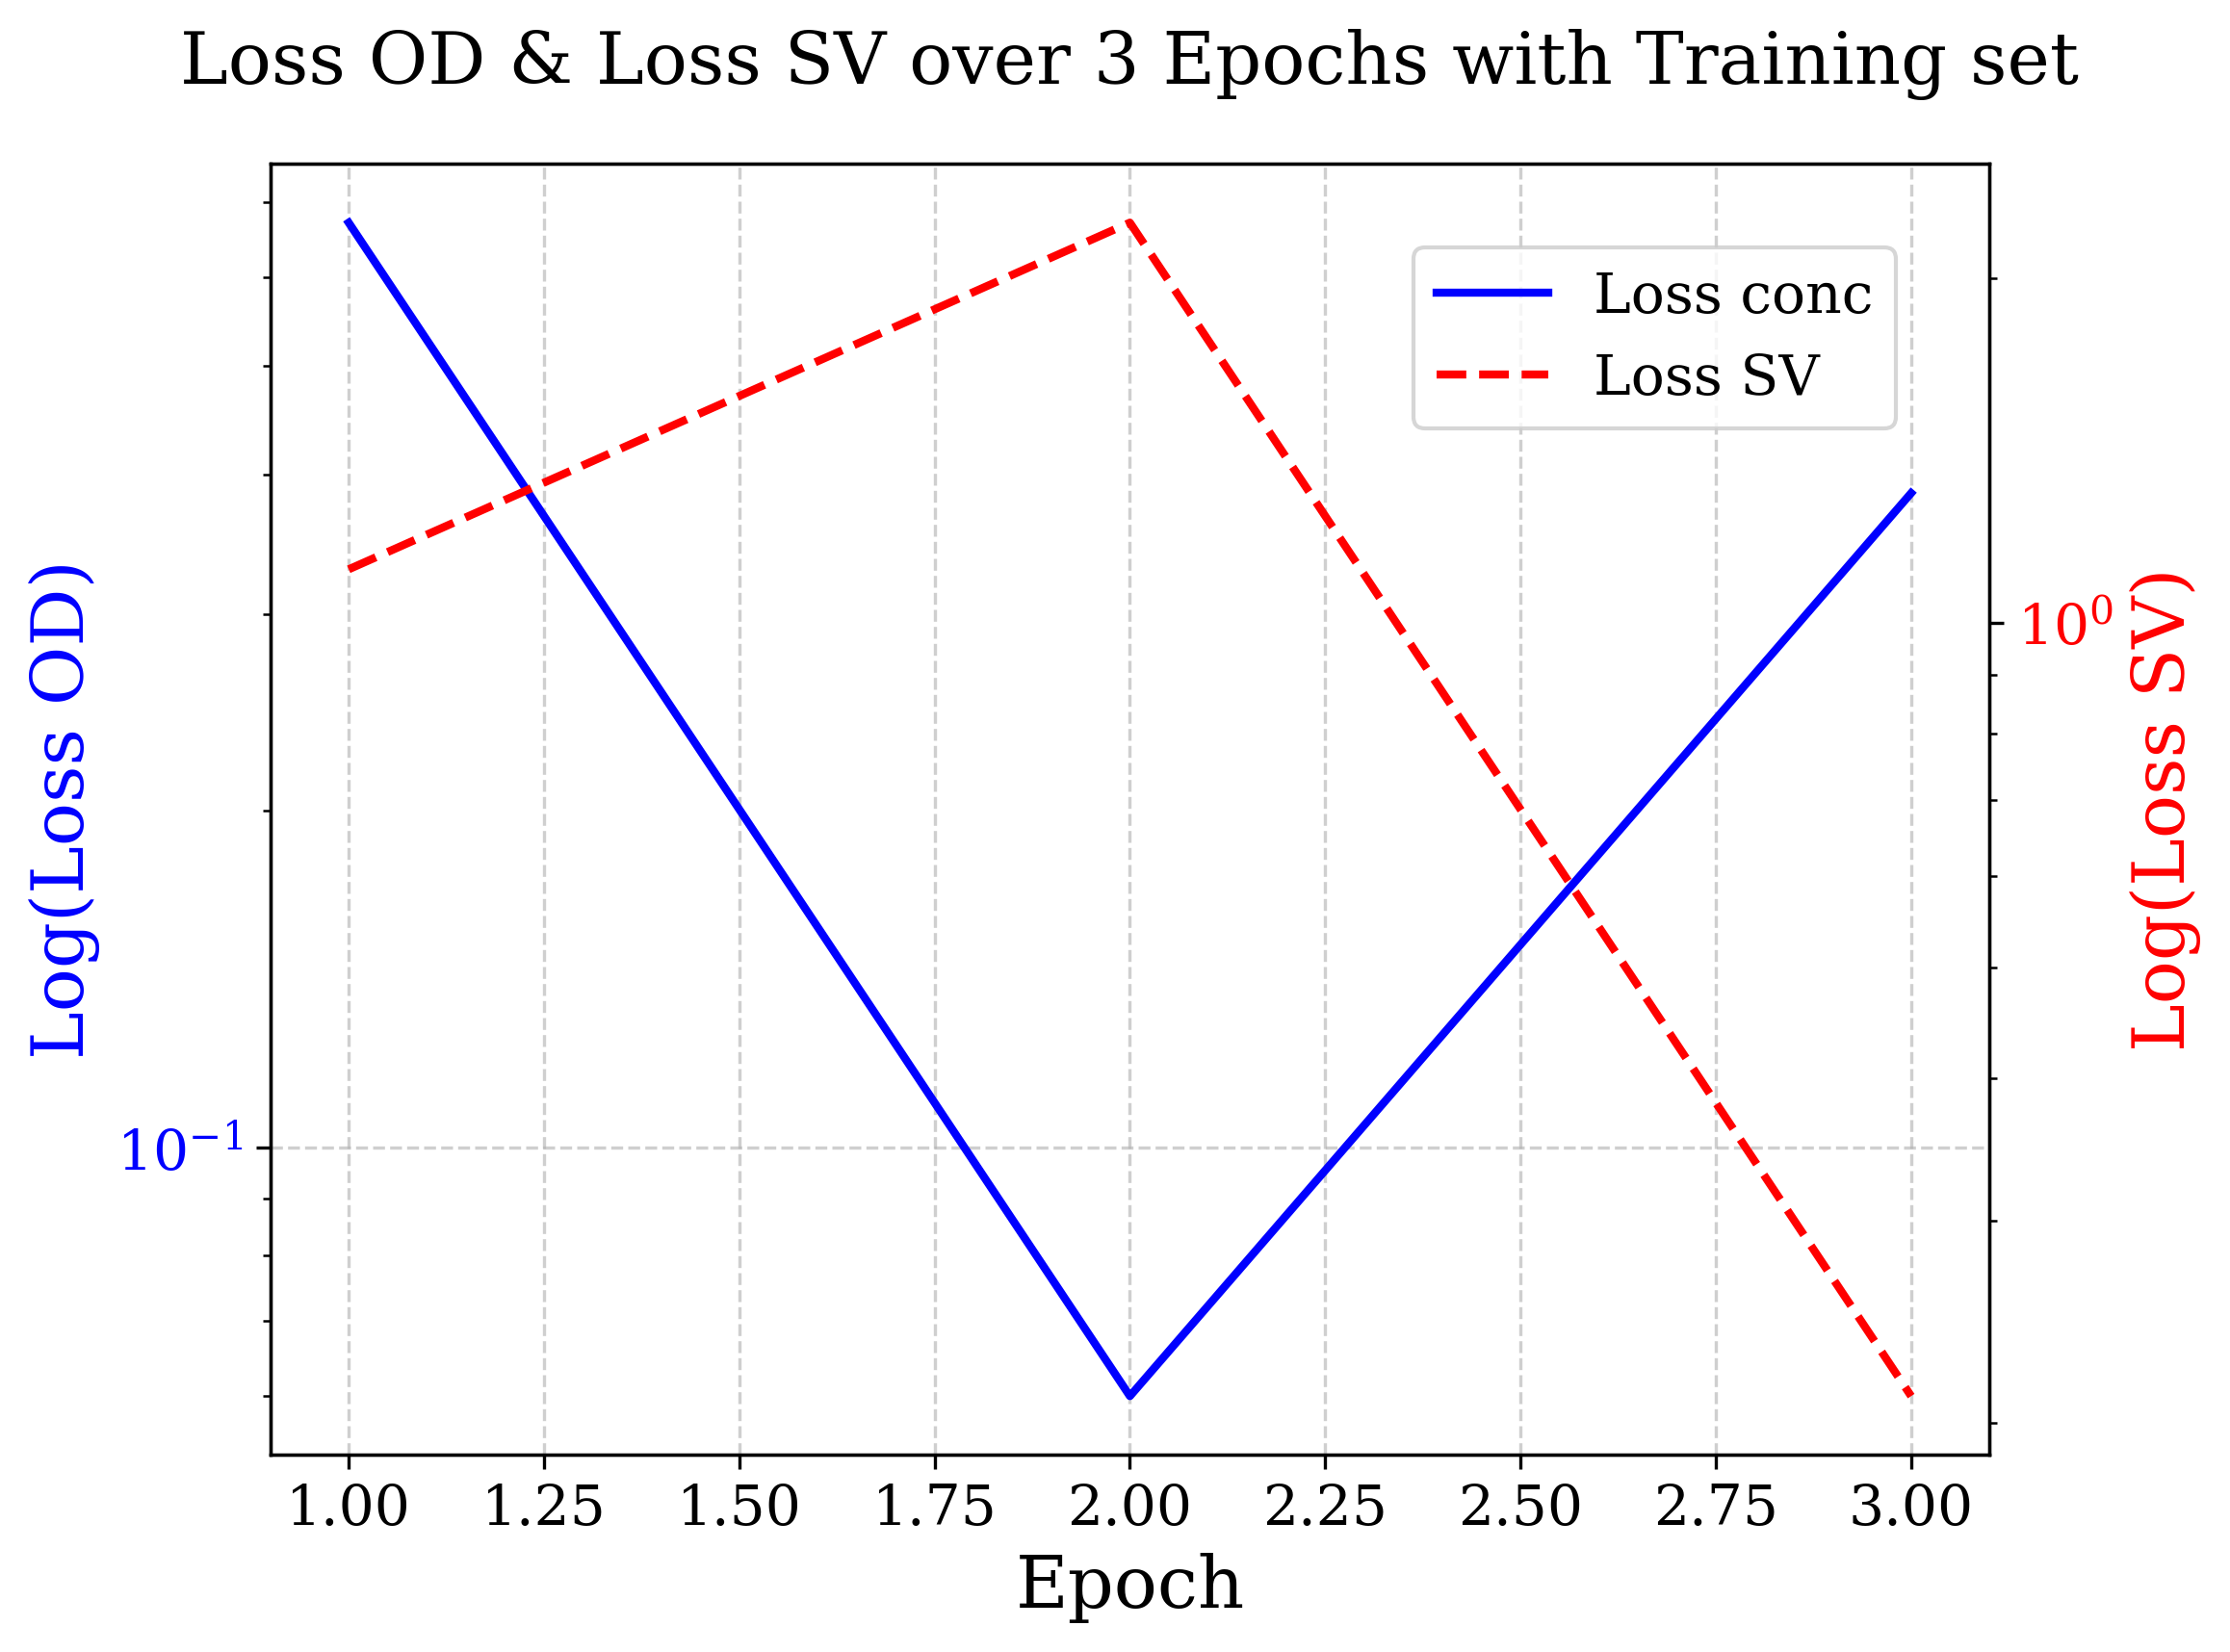

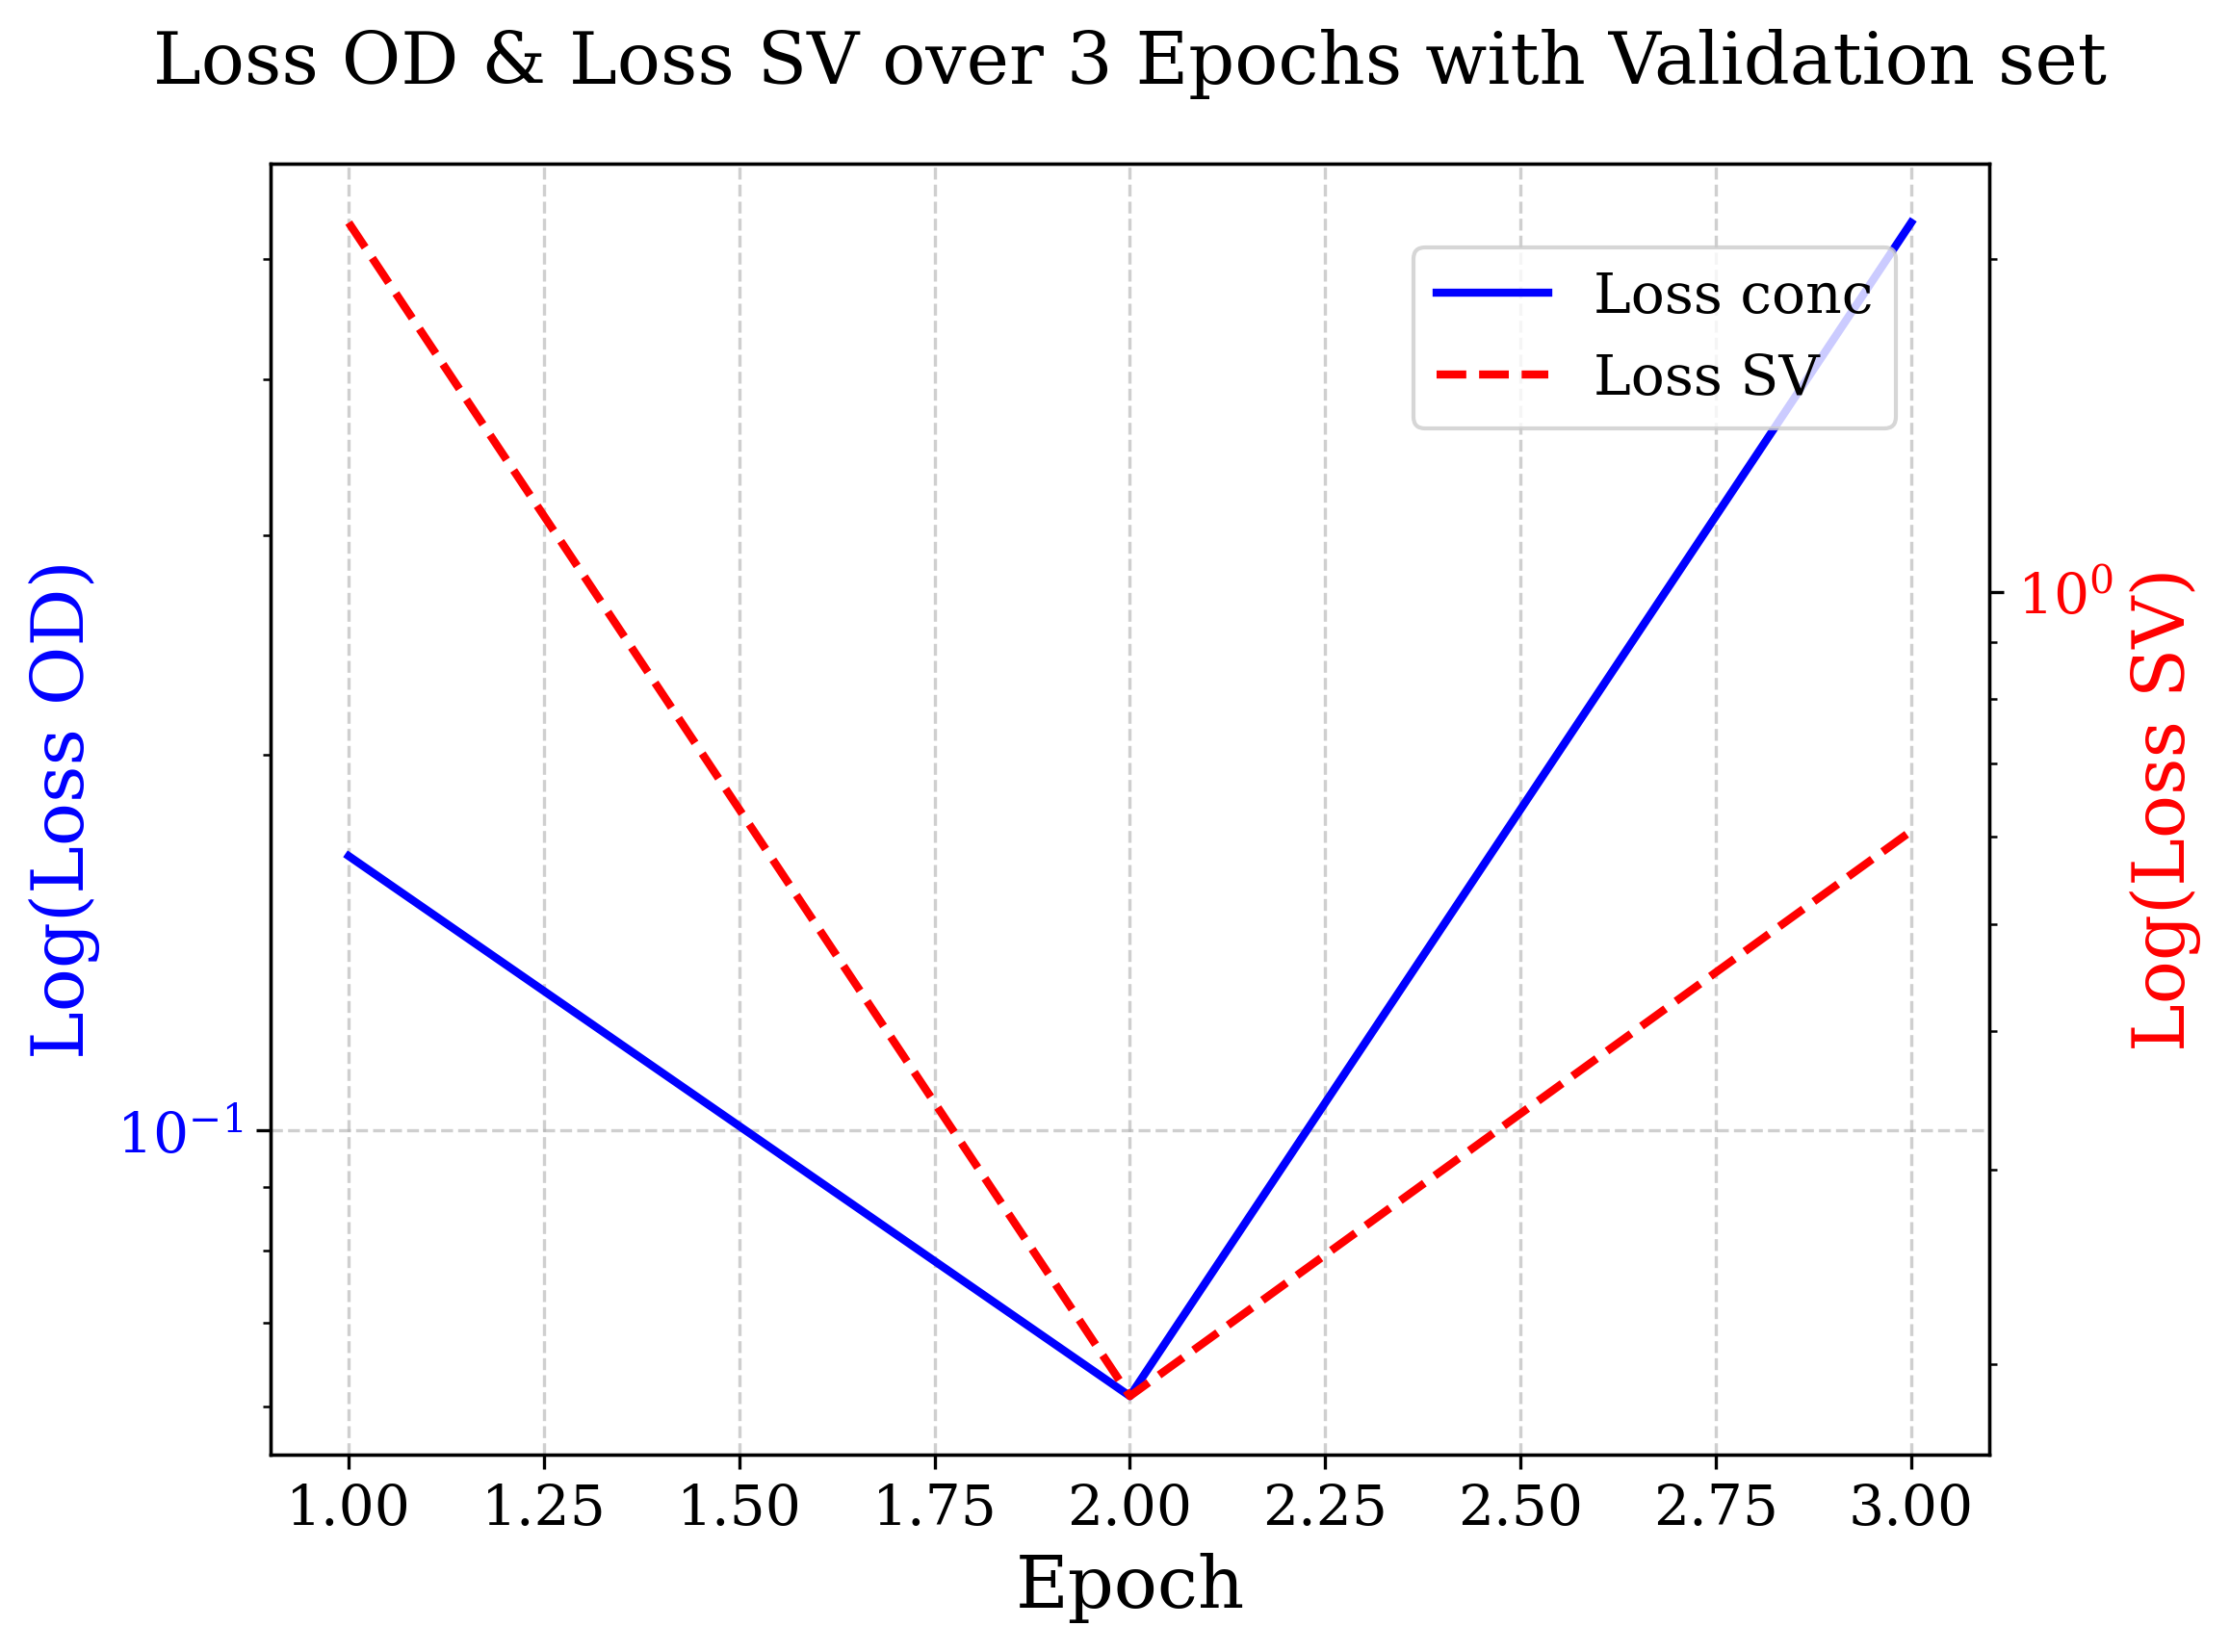

In [9]:
for i in range(N_iter):
    # Train
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=3,   # tune based on your experiments (280 experiments => one full cycle) def: 280
    decay_rate=0.9,
    staircase=True
    )
    (sv_train, conc_train), (sv_val, conc_val) = utils.train_model(
    model, train_array, val_array=val_array,  
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    num_epochs=num_epochs, batch_size=batch_size, patience=patience,
    verbose=True
    )

    # save model
    model_name = f'{folder}model/{run_name}_{str(i)}'
    model.save_model(model_name=model_name, verbose=True)

    # Plot training and validation loss curves
    utils.plot_losses('Training', conc_train, sv_train, num_epochs, save="./figure")

    if x_fold > 1:
        utils.plot_losses('Validation', conc_val, sv_val, num_epochs, save="./figure")